7-1 들어가며 <br>
7-2 벡터화 <br>
7-3 벡터화 실습: 원-핫 인코딩 구현해보기 <br>
7-4 워드 임베딩 <br>
7-5 Word2Vec (1) 분포가설 <br>
7-6 Word2Vec (2) CBow <br>
7-7 Word2Vec (3) Skip-gram과 Negative Sampling <br>
7-8 Word2Vec (4) 영어 Word2Vec 실습과 OOV 문제 <br>
7-9 임베딩 벡터의 시각화 <br>
7-10 FastText <br>
7-11 Glove <br>
7-12 마무리하며 <br>


### 7-1 들어가며 
자연어 처리에서 단어를 벡터화하는 방법 중 하나인 워드 임베딩에 대해서 배워보겠습니다. <br>

기계는 텍스트보다 수치화된 숫자를 더 잘 처리할 수 있습니다. 이런 이유로 기계가 자연어 처리를 원활히 할 수 있도록, 전처리 과정에서 텍스트를 벡터로 변환하는 벡터화(Vectorization) 라는 과정을 거치게 됩니다. <br><br>


### 7-2 벡터화
<b>Bag of Words / DTM(Document-Term Matrix)</b> <br>
Bag of Words: 단어의 순서를 고려하지 않고 단어의 등장빈도(frequency)만을 고려해서 단어를 벡터화하는 방법 <br>

[단점] <br>
- Sparsity: 단어의 개수가 많으면 벡터의 차원이 많아짐 <br>
- Ignoring word orders: 문장의 뜻을 무시해버림 <br>
- Out of vocabulary: 단어가 조금만 달라져도 unknown으로 취급 (ex. US, United States) <br><br>

문서를 행으로, 단어를 열로 구성한 행렬: <b> DTM (문서 단어 행렬, Document-Term Matrix) </b>
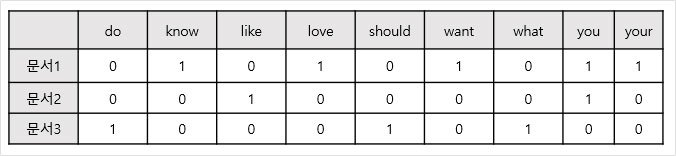 </br>
대부분의 값이 0이라는 특징을 가지고 있는데, 이런 벡터를 <b>희소벡터(sparse vector)</b>라고 한다. <br>

<b> TF-IDF </b> <br>
Term Frequenct - Inverse Document Frequency <br>
'the', 'a' 같은 빈번하게 나오지만 중요하지 않은 article 단어

<b> 원-핫 인코딩(one-hot encoding) </b>
각 단어에 임의로 부여한 정수, 숫자 부여에 정해진 규칙은 없지만 관례적으로는 빈도수가 높은 단어들부터 낮은 숫자를 부여함, 가장 많이 등장한 단어는 1부터 부여하는 식. <br>
원-핫 인코딩을 통해 얻은 벡터를 원-핫 벡터(one-hot vector)라고 함. 여기서는 정수를 1부터 부여한다고 가정했지만 실제로는 0번 단어를 사용하기도 하고, 인덱스도 0번부터 시작하기도 한다. <br><br>


### 7-3 벡터화 실습: 원-핫 인코딩 구현해보기

Step 1.패키지 설치하기

In [1]:
import re
from konlpy.tag import Okt
from collections import Counter
print("임포트 완료")

임포트 완료


In [2]:
text = "임금님 귀는 당나귀 귀! 임금님 귀는 당나귀 귀! 실컷~ 소리치고 나니 속이 확 뚫려 살 것 같았어."
text

'임금님 귀는 당나귀 귀! 임금님 귀는 당나귀 귀! 실컷~ 소리치고 나니 속이 확 뚫려 살 것 같았어.'

Step 2. 전처리 이야기 <br>


In [ ]:
reg = re.compile("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]")
text = reg.sub('', text)
print(text)

Step 3. 토큰화 이야기 <br>
단어장을 구성하기 위해서는 단어장의 원소인 토큰(token)이라는 단위를 정해줄 필요가 있음. 그리고 한국어는 주로 형태소 분석기를 통해서 토큰 단위를 나눠준다.

In [ ]:
okt=Okt()
tokens = okt.morphs(text)
print(tokens)

Step 4. 단어장 만들기 <br>
이제 이 토큰들을 가지고 단어장을 만들어 볼 텐데요. 여기서는 빈도수가 높은 단어일수록 낮은 정수를 부여하려고 합니다. 빈도수가 높은 순서대로 낮은 정수를 부여하기 위해서 각 단어의 빈도수를 카운트 할 필요가 있겠죠? 여기서는 파이썬의 Counter 서브클래스를 사용해서 단어의 빈도를 카운트해 보겠습니다.

In [ ]:
vocab = Counter(tokens)
print(vocab)

In [ ]:
vocab['임금님']

In [ ]:
vocab_size = 5
vocab = vocab.most_common(vocab_size) # 등장 빈도수가 높은 상위 5개의 단어만 저장
print(vocab)

In [ ]:
word2idx={word[0] : index+1 for index, word in enumerate(vocab)}
print(word2idx)

Step 5:원-핫 벡터 만들기 <br>
원-핫 인코딩을 하는 함수를 만들어 각 단어를 원-핫 벡터로 만들어볼게요. 아래의 함수는 특정 단어와 단어장을 입력하면 해당 단어의 원-핫 벡터를 리턴하는 함수에요.

In [ ]:
def one_hot_encoding(word, word2index):
    one_hot_vector = [0]*(len(word2index))
    index = word2index[word]
    one_hot_vector[index-1] = 1
    return one_hot_vector
print("슝=3")

In [ ]:
one_hot_encoding("임금님", word2idx)

케라스를 통한 원-핫 인코딩(one-hot encpoding) <br>

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
print("임포트 완료")

In [ ]:
text = [['강아지', '고양이', '강아지'],['애교', '고양이'], ['컴퓨터', '노트북']]
text

In [ ]:
t = Tokenizer()
t.fit_on_texts(text)
print(t.word_index) # 각 단어에 대한 인코딩 결과 출력.

In [ ]:
vocab_size = len(t.word_index) + 1
print("슝=3")

In [ ]:
sub_text = ['강아지', '고양이', '강아지', '컴퓨터']
encoded = t.texts_to_sequences([sub_text])
print(encoded)

In [ ]:
one_hot = to_categorical(encoded, num_classes = vocab_size)
print(one_hot)

### 7-4 워드 임베딩

<b>희소 벡터(Sparse Vector)의 문제점</b>
원-핫 인코딩의 경우 단어장의 크기가 30000이라면 30000개의 모든 단어 벡터는 각각 30,000차원의 벡터가 된다. <br>
하나의 원소만 1이고 29999개의 원소가 0의 값을 가질때 의미가 없다. <br><br>

<b>문제점1</b> <br>
<b>차원의 저주 (curse of dimensionality)</b>라는 문제가 있음. 같은 정보를 저차원과 고차원에 각각 표현한다고 할 때 저차원에서는 정보의 밀도가 상대적으로 커지지만, 고차원에서는 정보가 흩어지며 밀도가 작아진다. <br><br>
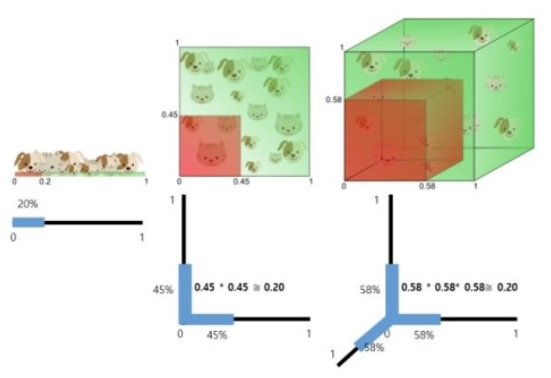 <br>

<b>문제점2</b> <br>
원-핫 벡터는 단어간 유사도를 반영하지 못한다. 벡터 간 유사도를 구하는 방법으로는 대표적으로 내적(inner product)가 있다. <br>
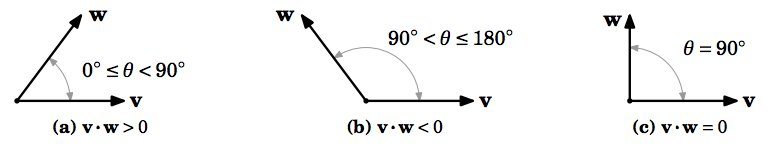 <br><br>

<b>대안</b> <br>
word embedding, 이를 통해 얻는 밀집 벡터는 각 차원이 0과 1이 아닌 다양한 실숫값을 가지며, 이 밀집 벡터를 <b>임베딩 벡터 (embedding vector)</b>라고 한다. <br>

<b>워드 임베딩 (Word Embedding)</b> <br>
한 단어를 벡터로 바꾼다. 이 벡터의 길이를 일정하게 정해준다. 더 많은 단어가 있다고 해서 벡터의 길이가 길어지지 않는다. 여기서 일반적으로 벡터의 길이가 단어장 크기보다 매우 작기 때문에 각 벡터 값에 정보가 축양되어야 하고 결국 <b>밀집벡터</b>가 된다. <br>

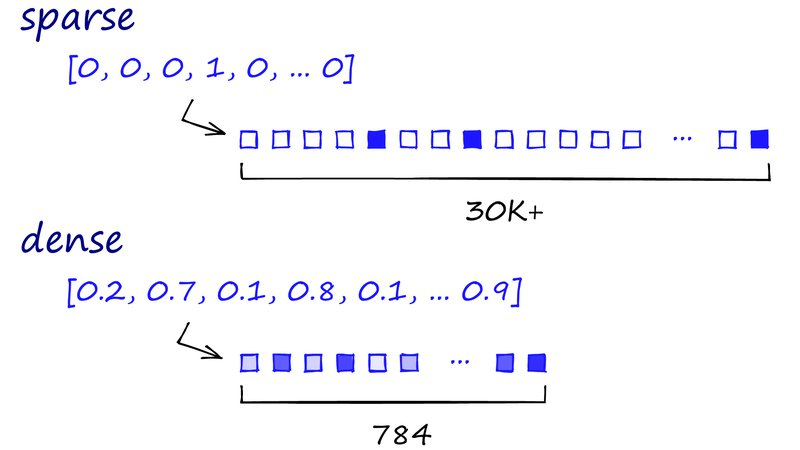 <br>

워드 임베딩에서 중요한 것은 2가지: <br>
- 한 단어를 길이가 비교적 짧은 밀집 벡터로 나타낸다. <br>
- 이 밀집 벡터는 단어가 갖는 의미나 단어 간의 관계 등을 어떤 식으로든 내포하고 있다. <br>

그 이외에 <b>FastText</b>나 <b>GloVe</b>등도 추가로 제안 <br><br>


### 7-5 Word2Vec (1) 분포 가설

장점: <br>
단점: 단어간의 유사도를 나타낼 수 없다. <br> 
스킵그램이라는 방법 <br>

<b> 분포 가설 (Distributional Hypothesis) </b>
Word2Vec은 단어의 의미를 여러 차원에 분산하여 표현한 벡터이다. <br>
Word2Vec의 핵심 아이디어는 분포가설(distributional hypothesis)를 따른다. John Rupert Firth는 '비슷한 문맥에서 같이 등장하는 경향이 있는 단어들은 비슷한 의미를 가진다'라는 가설. 이 가설에 따르면 Word2Vec은 같이 등장하는 경향이 적은 단어들이 비해 '강아지', '애교', '귀여운'과 같은 단어들을 상대적으로 유사도가 높은 벡터로 만든다. <br><br>


### 7-6 Word2Vec (2) CBoW  --> 이거 필기보충해야함
Word2Vec에는 크게 CBoW와 Skip-gram이라는 2가지 방법이 있음. <br>
CBoW는 주변에 있는 단어들을 통해 중간에 있는 단어들을 예측하는 방법이다. <br>
반대로 Skip-Gram은 중간에 있는 단어로 주변 단어들을 예측하는 방법이다. <br>

<b>CBoW (Continous Bag of Words)</b>
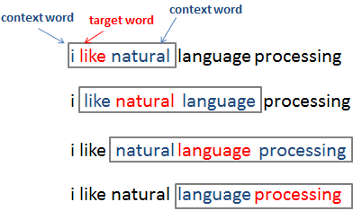 <br>
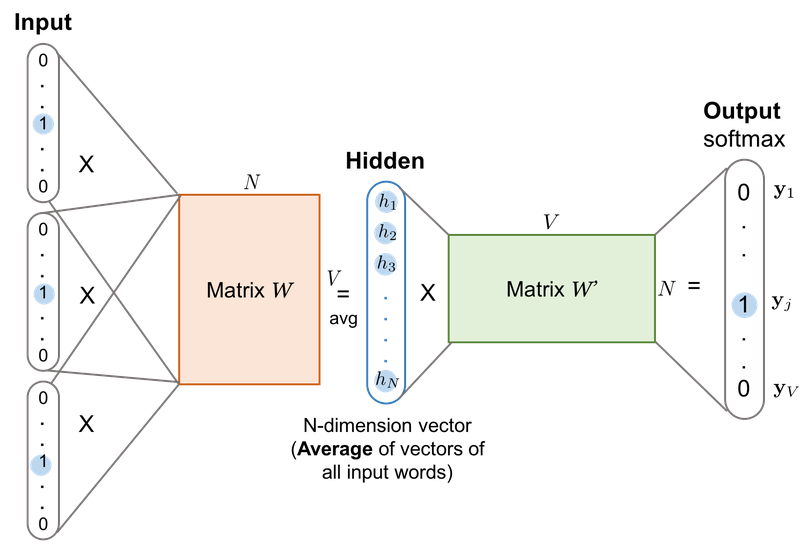 <br>


Word2Vec에서의 은닉층은 활성화 함수가 존재하지 않고, 단순히 가중치 행렬과의 곱셈만을 수행하기에 기존 신경망의 은닉층과 구분 지어 투사층(projection layer) 이라고도 합니다.
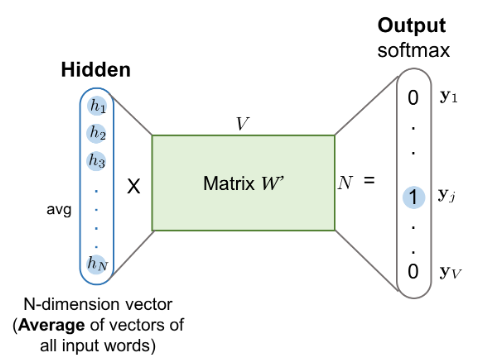 <br><br>



### 7-7 Word2Vec (3) Skip-gram과 Negative Sampling --> 이거 필기보충해야함

<b> Skip-gram </b> <br>
Skip-gram을 시각화한 그림은 다음과 같다. <br>
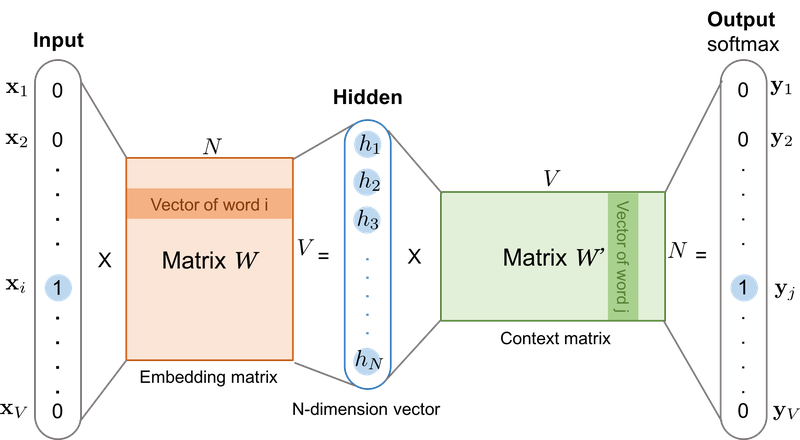 <br>


<b> Negative sampling </b> <br>
Word2Vec의 구조는 연산량이 지나치게 많아 실제로 사용하기 어려움

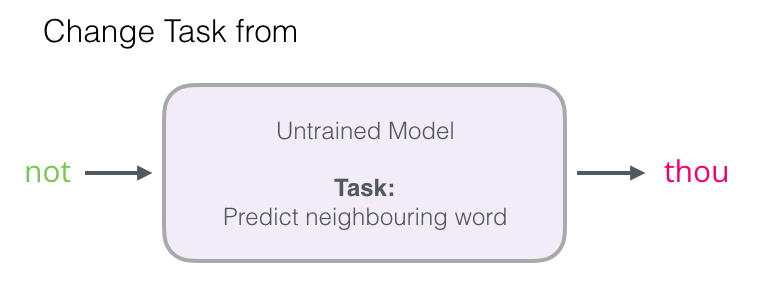 <br>
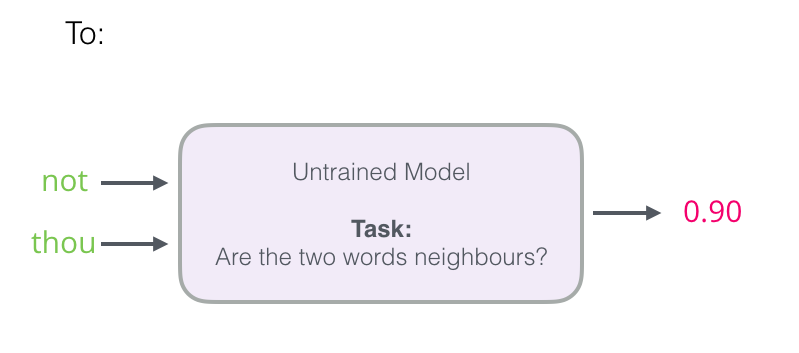 <br><br>


### 7-8 Word2Vec (4) 영어 Word2Vec 실습과 OOV 문제 --> 이거 필기보충해야함

In [ ]:
import nltk
nltk.download('abc')
nltk.download('punkt')

In [ ]:
from nltk.corpus import abc
corpus = abc.sents()
print("슝~")

In [ ]:
print(corpus[:3])

In [ ]:
print('코퍼스의 크기 :',len(corpus))

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = corpus, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)
print("모델 학습 완료!")

In [ ]:
model_result = model.wv.most_similar("man")
print(model_result)

In [ ]:
from gensim.models import KeyedVectors

model.wv.save_word2vec_format('~/aiffel/word_embedding/w2v') 
loaded_model = KeyedVectors.load_word2vec_format("~/aiffel/word_embedding/w2v")
print("모델  load 완료!")

In [ ]:
model_result = loaded_model.most_similar("man")
print(model_result)

#### Word2Vec의 OOV문제

Word2Vec은 Bag of words 학습 과정에서 언급되었던 문제인 사전에 없는 단어(Out Of Vocabuary) 문제를 그대로 가지고 있다.

In [ ]:
# 에러가 나더라도 놀라지 마세요.
loaded_model.most_similar('overacting')

### 7-9 임베딩 벡터의 시각화

https://projector.tensorflow.org/


### 7-10 FastText

"(중심 단어, 주변 단어)"의 쌍을 가지고 이 쌍이 포지티브인지 네거티브인지 예측을 진행한다. 다만, Word2Vec과 다른 점은 학습 과정에서 중심 단어에 속한 문자 단위 n-gram 단어 벡터들을 모두 업데이트한다는 점이다.

In [ ]:
from gensim.models import FastText
fasttext_model = FastText(corpus, window=5, min_count=5, workers=4, sg=1)
print("FastText 학습 완료!")

In [ ]:
fasttext_model.wv.most_similar('overacting')

In [ ]:
fasttext_model.wv.most_similar('memoryy')

<b>한국어에서의 FastText </b><br>
영어에서 알파벳 단위가 n-gram, 한국어의 경우에는 음절 단위<br>

(1) 음절 단위 FastText <br>
<b>사실은 자소 단위</b> <br>

(2) 자소 단위 FastText <br>

### 7- 11 GloVe
<b>글로브(Global Vectors for Word Representation, GloVe)</b> 는 2014년에 미국 스탠포드 대학에서 개발한 워드 임베딩 방법론입니다. 워드 임베딩의 두 가지 접근 방법인 <b>카운트 기반과 예측 기반 두 가지 방법을 모두 사용했다</b>는 것이 특징 <br>


<b>잠재 의미 분석(LSA, Latent Semantic Analysis) </b> <br>
https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/04/06/pcasvdlsa/ <br>

LSA를 요약하면 DTM에 특잇값 분해를 사용하여 잠재된 의미를 이끌어내는 방법론 <br>


<b> 윈도우 기반 동시 등장 행렬(Window based Co-occurrence Matrix) </b> <br>
GloVe를 이해하기 위해서는 <b>윈도우 기반 동시 등장 행렬</b>의 정의에 대해서 이해할 필요가 있다. <br>

<b> 동시 등장 확률(Co-occurrence Probability) </b> <br>
동시 등장 확률 P(k|i)는 동시 등장 행렬로부터 특정 단어 i의 전체 등장 횟수를 카운트하고, 특정 단어 i가 등장했을 때 어떤 단어 k가 등장한 횟수를 카운트하여 계산한 조건부 확률. <br>
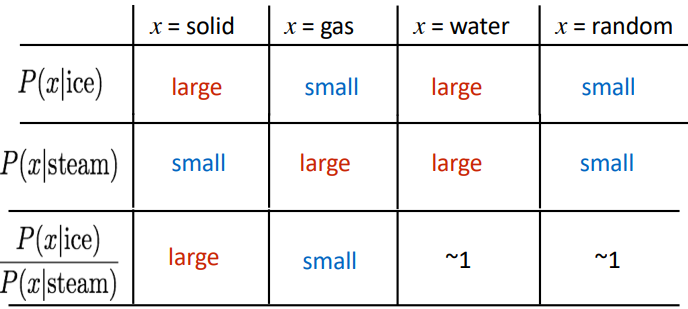 <br>


<b>GloVe의 손실함수 설계하기</b> <br>

<b>pre-trained GloVe 모델 실습</b>

In [ ]:
import gensim.downloader as api
glove_model = api.load("glove-wiki-gigaword-50")  # glove vectors 다운로드
glove_model.most_similar("dog")  # 'dog'과 비슷한 단어 찾기

In [ ]:
glove_model.most_similar('overacting')

In [ ]:
glove_model.most_similar('memoryy')